## MODELOS AVANZADOS DE ANALISIS DE DATOS


## GRUPO 2: ##
Marta Pizarro       202027959

Diego Quevedo       200914623

Alfredo Hincapié    199817792

Guillermo Andrade   202027949

Elber Pardo         200017815


In [73]:
import warnings; 
warnings.simplefilter('ignore')

La base de datos se descargo de Google Trends y corresponde al "ïndice de tendencia" de las búsquedas por el tópico de bienes raices.  Comienza la serie en enero de 2004 hasta julio de 2021.

In [8]:
#Cargar librerías

import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 9
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from pandas.plotting import register_matplotlib_converters
#import plotly.express as px
#import plotly.graph_objects as go
import random 
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy as sp
import scipy.stats
import seaborn as sns
#import rpy2.robjects as robjects
import json
#from sorted_months_weekdays import *
#from sort_dataframeby_monthorweek import *
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import seaborn as sns
from pandas.plotting import scatter_matrix
register_matplotlib_converters()

In [19]:
df.info #primeras y úlitmas filas

<bound method DataFrame.info of          Mes  Indice_tendencia
0    2004-01                65
1    2004-02                86
2    2004-03                63
3    2004-04                85
4    2004-05                98
..       ...               ...
206  2021-03                41
207  2021-04                40
208  2021-05                46
209  2021-06                46
210  2021-07                43

[211 rows x 2 columns]>

In [12]:
%matplotlib inline
sns.set()

In [16]:
#Datos de google trends sobre preferencias en temas de bienes raices 2004-2021
#Importación de los datos
data = pd.ExcelFile('C:/Users/pcmgmt/Documents/MODELOS AVANZADOS1_2021/TAREAS/E2.xlsx')
print(data.sheet_names)#revisar datos
#Data Frame de la hoja "Datos"
df=data.parse('Hoja1')#seleccionar una hoja específica
df.head()

['Hoja1']


,Mes,Indice_tendencia
0,2004-01,65
1,2004-02,86
2,2004-03,63
3,2004-04,85
4,2004-05,98


In [17]:
df.describe() #análisis rápido de los datos

,Indice_tendencia
count,211.000000
mean,52.450237
std,12.042826
min,24.000000
25%,46.000000
50%,50.000000
75%,57.000000
max,100.000000


In [18]:
type(df)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Tendencia bienes raíces')

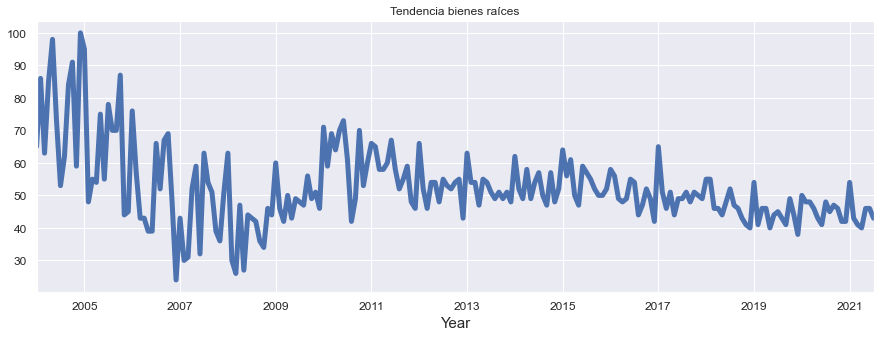

In [33]:
df.Mes=pd.to_datetime(df.Mes)###dejar la serie en formato de fecha, la columna Mes
trend=df.set_index('Mes')#indica que la serie es mensual
tstrend=trend['Indice_tendencia']##Convertir en serie de tiempo
tstrend.plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);

plt.plot(tstrend)
plt.title('Tendencia bienes raíces')

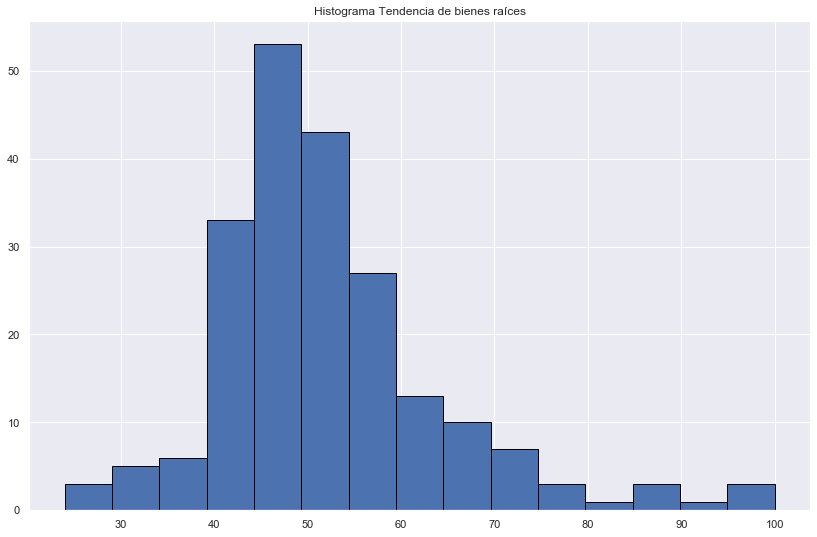

<Figure size 1008x648 with 0 Axes>

In [21]:
plt.title('Histograma Tendencia de bienes raíces')
plt.hist(tstrend, bins=15, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

# Se aprecia en el histograma una distribución normal con asimétrica positiva

 # Is the time series stationary? #

Hasta 2009 encontramos descensos en el interés por bienes raices, de 2009-2011 aumenta y en adelante parece descender. pero con una tendencia menor

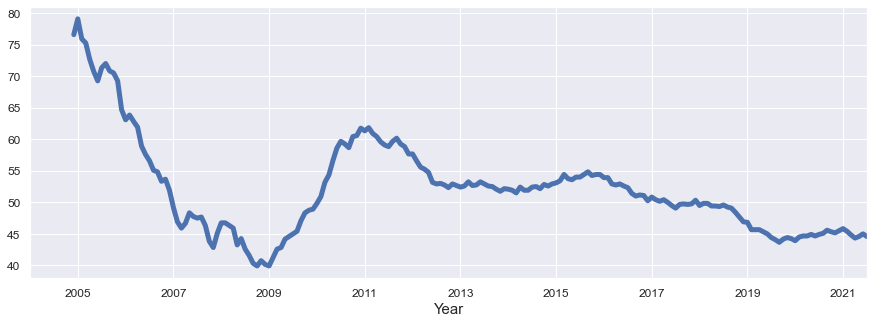

In [37]:
tstrend.rolling(12).mean().plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);

# Is the time series stationary?


Para probar la estacionariedad se utiliza el test de estacionariedad de Dickey Fuller.
Stationary: media y varianza son constantes

* Ho: la serie NO es estacionaria. 

Si p-value <0.05 rechazo Ho.  
Si p-value >0.05 no rechazo Ho, se sugiere que la serie tiene una raíz unitaria; es decir, No es estacionaria.  

Para este caso p-value = 0.077813 > 0.05, por lo cual acepta Ho; es decir, la serie no es estacionaria.  Para volverla estacionaria se tendría que diferencia (diff)

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
result = adfuller(tstrend.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.678614
p-value: 0.077813
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


# Construct and plot the trend component of the time series #

1. Utilizando promedios móviles (rolling) Encontramos que hasta 2009 la tendencia del índice es descendente, de 2009-2011 aumenta y en adelante parece descender. pero con una tendencia más suave. 
La tendencia descendente hasta 2009 podría explicarse por la crisis de los mercados internacionales que desato el colapso del mercado inmobiliario estadounidense.  Posteriormente, hasta 2011 se evidencia una recuperación debido a los recortes de tasas y el estímulo monetario de la FED para revertir este fenómeno.

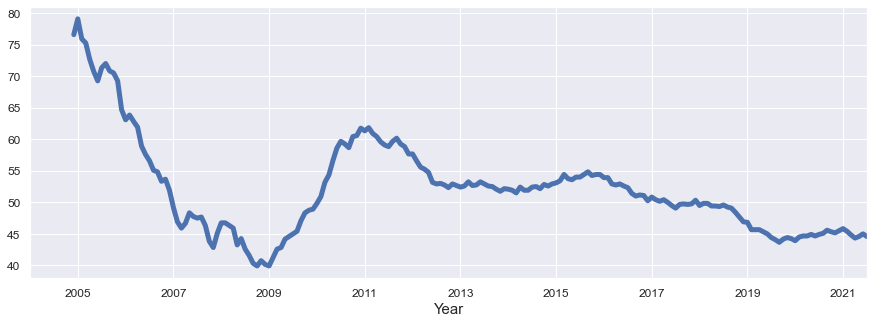

In [38]:
tstrend.rolling(12).mean().plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);

2. Realizamos una regresión lineal para identificar tendecia de toda la serie. Aunque la tendencia es decreciente, no recoge los movimientos en ciertos periodos de tiempo.

In [40]:
from sklearn.linear_model import LinearRegression

In [96]:
X1=np.arange(2003+12/12,2021+7/12,1/12)#desde donde comienza y 1/12 periodicidad (mensual)
X=X1
X = np.reshape(X, (len(X), 1))
y = tstrend.values

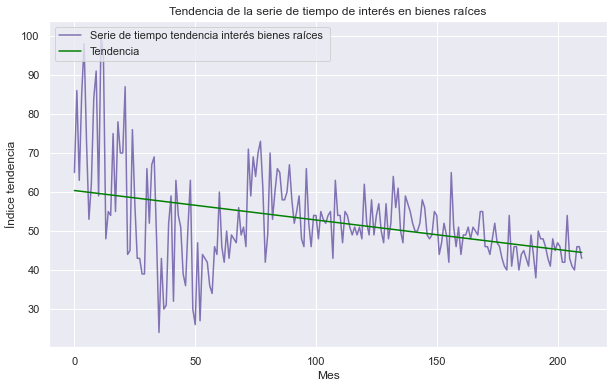

In [97]:
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(y,color ='m', label='Serie de tiempo tendencia interés bienes raíces ')
ax.plot(trend, color ='green', label='Tendencia')
ax.set_xlabel('Mes')
ax.set_ylabel('Índice tendencia')
ax.set_title('Tendencia de la serie de tiempo de interés en bienes raíces')
ax.grid(True)
ax.legend(loc='upper left')

# SEASONAL DECOMPOSE (paquete pandas)
Esta función descompone la variable objeto de estudio en sus componentes de tendencia, estacionalidad (ajustándola a un periodo de tiempo) y calcula el residuo correspondiente.
Para este caso encontramos un ajuste anual. 

Se aprecia que la tendencia hasta 2009 es decreciente, de 2009 a 2011 sube pero no alcanza los niveles máximos registrados en 2004; y luego comienza a decrecer lentamente.

También se observa claramente la estacionalidad (seasonal) de la serie, con unos picos que parecen estar relacionados con la temporada de fin de año, y luego caen fuertemente, posteriormente tiene períodos  con alti-bajo moderados, y a continuación una recuperación fuerte.

Respecto a los residuos se observa que son bastante grandes en los primeros años hasta 2008, y posterioremente tienden a ubicarse cerca a cero. 

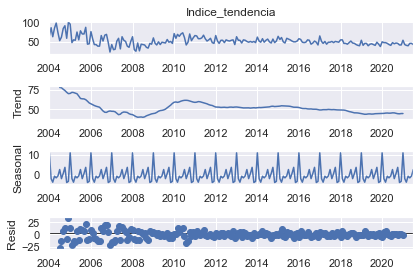

In [77]:
result=seasonal_decompose(tstrend, model='additive')
r=result.plot();

# Construct and plot the seasonal component of the time series #

1. Exploramos el método de "diferenciación" -diff-, de primer orden tratando de remover la tendencia.
Sin embargo, aunque parece haber algunos componentes de estacionalidad anual, es dificil identificar alguna estacionalidad.

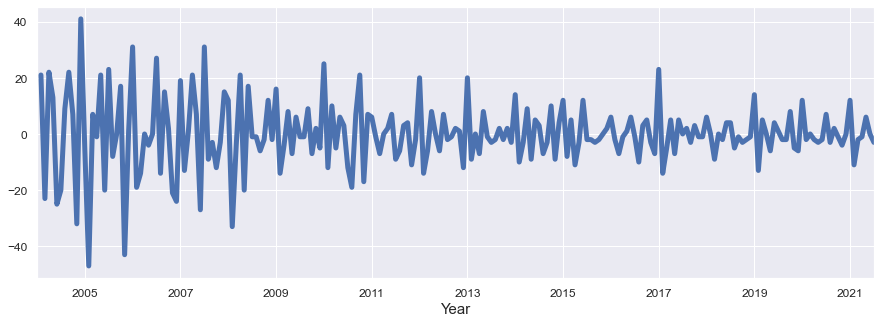

In [62]:
tstrend.diff().plot(figsize=(15,5), linewidth=5, fontsize=12)
plt.xlabel('Year', fontsize=15);

2. Extraemos el componente estacional de la función SEASONAL_DECOMPOSE de panda 

In [80]:
season2=pd.DataFrame(result.seasonal) #toma la tendencia de promedios móviles por seasonal_descompose
seasonaly=np.array(season2)# Crear un array

Extrayendo el componente de estacionalidad, se aprecian ciclos,que comienzan al inicio de cada período

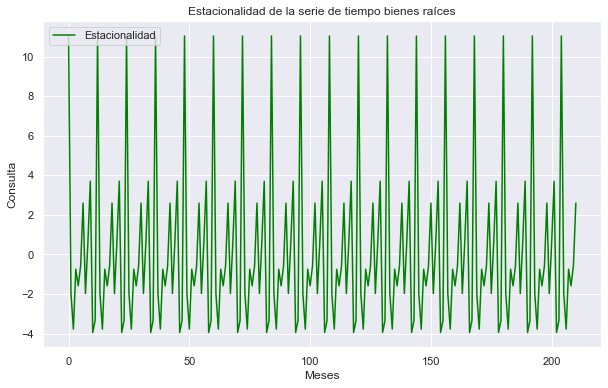

In [81]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(seasonaly, color ='green', label='Estacionalidad')
ax.set_xlabel('Meses')
ax.set_ylabel('Consulta')
ax.set_title('Estacionalidad de la serie de tiempo bienes raíces')
ax.grid(True)
ax.legend(loc='upper left');

# Is the detrended time series stationary? #  

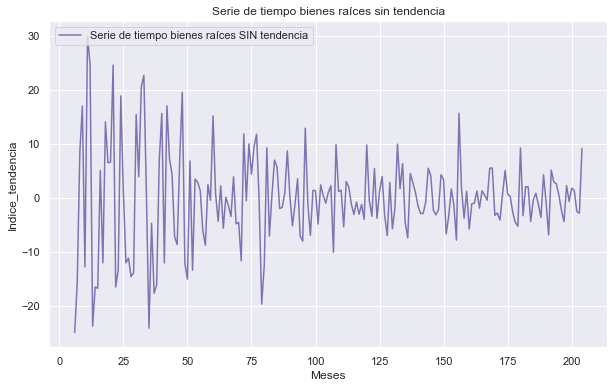

In [105]:
##Eliminar la tendencia de la serie
detrended = [y[i]-trendy[i] for i in range(0, len(tstrend))]

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(detrended,color ='m', label='Serie de tiempo bienes raíces SIN tendencia')
ax.set_xlabel('Meses')
ax.set_ylabel('Indice_tendencia')
ax.set_title('Serie de tiempo bienes raíces sin tendencia')
ax.grid(True)
ax.legend(loc='upper left');

tstrend_detrend=pd.Series(detrended,index=tstrend.index)

In [115]:
detrended1 = [y[i]-trendy[i] for i in range(6, len(tstrend)-6)]

indice=[tstrend.index[i] for i in range (6,len(tstrend)-6)]

tstrend_detrend=pd.Series(detrended1,index=indice)


In [117]:
result1 = adfuller(tstrend_detrend.values)
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.555664
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Ho: la serie NO es estacionaria.
Si p-value <0.05 rechazo Ho.
Si p-value >0.05 no rechazo Ho, se sugiere que la serie tiene una raíz unitaria; es decir, No es estacionaria.

Para este caso p-value = 0.0000 < 0.05, por lo cual Rechaza Ho; es decir, la serie es estacionaria. 

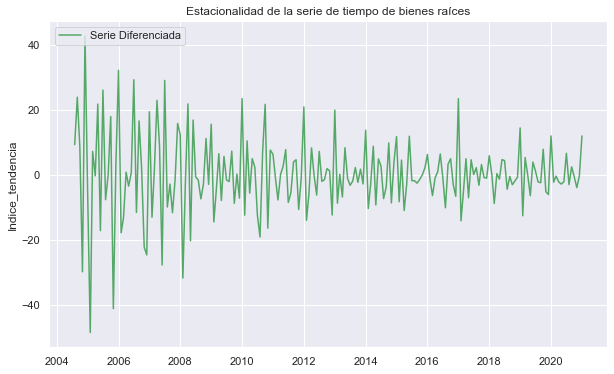

In [118]:
Dif_tstrend=tstrend_detrend.diff(periods=1) #Se diferencia la serie para quitar la tendencia
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Dif_tstrend, 'g', label="Serie Diferenciada")
#ax.plot(tstrend_detrend, 'm', label="Serie sin Tendencia")
ax.set_xlabel('')
ax.set_ylabel('Indice_tendencia')
ax.set_title('Estacionalidad de la serie de tiempo de bienes raíces')
ax.grid(True)
ax.legend(loc='upper left');

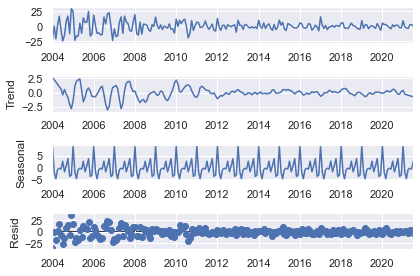

In [97]:
result_sin_tend=seasonal_decompose(tstrend_detrend, model='additive',extrapolate_trend=6)
r=result_sin_tend.plot();

# Construct a plot to analyze the autocorrelation #

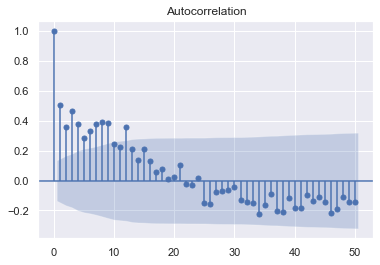

In [144]:
plot_acf(tstrend, lags=50);

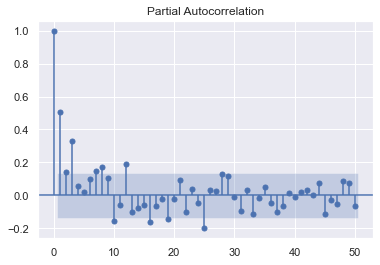

In [145]:
plot_pacf(tstrend, lags=50);

Con AutoCorrelation Fuction (ACF), se aprecia que en la serie original no hay caídas abruptas, sino que caen exponencialmente, por lo cual se podría afirmar que estamos ante un modelo AR.

Posteriormente, con el partial autocorrelation function (PACF), deterinamos que el lag sería uno donde apreciamos la caída abrupta